In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
data01 = pd.read_csv('C:/51mtech/desertation/data/01.tweets-with-sarcasm-and-irony/train.csv')
#data01.info()
print(data01.groupby('class').count())

data01_temp = data01[data01['class'] == 'sarcasm']
data01 = data01_temp.append(data01[data01['class'] == 'regular'])
print(data01.groupby('class').count())

            tweets
class             
figurative   21238
irony        20894
regular      18595
sarcasm      20681
         tweets
class          
regular   18595
sarcasm   20681


In [6]:
data01_test = pd.read_csv('C:/51mtech/desertation/data/01.tweets-with-sarcasm-and-irony/test.csv')
#data01_test.info()
print(data01_test.groupby('class').count())

data01_test_temp = data01_test[data01_test['class'] == 'sarcasm']
data01_test = data01_test_temp.append(data01_test[data01_test['class'] == 'regular'])
print(data01_test.groupby('class').count())

            tweets
class             
figurative    2044
irony         2111
regular       1859
sarcasm       2105
         tweets
class          
regular    1859
sarcasm    2105


In [7]:
data01.head(10)

,tweets,class
60727,“@ThinkingHumanit: #Sarcastic People Are Actua...,sarcasm
60728,Be aware dirty step to get money #staylight ...,sarcasm
60729,In CA for 5 days and it rains 2 of them. #imag...,sarcasm
60730,Because we have no access to implements at hom...,sarcasm
60731,And the news gets even better... #sarcastic #D...,sarcasm
60732,"Don't ride him too long Joe, Edwin and Travis ...",sarcasm
60733,@IminworkJeremy @medsingle #DailyMail readers ...,sarcasm
60734,When you tell your server that you only want a...,sarcasm
60735,"""Most functional part of the fam."" Yeah okay. ...",sarcasm
60736,@aisyeizhar kemon la siapa la yang tak tau tu....,sarcasm


In [15]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer

#nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

def to_lowercase(text):
    return text.lower()

def remove_urls(text):
    return re.sub(r"http\S+","",text)

def remove_hashtag(text):
    return re.sub(r"#","",text)

def remove_mention(text):
    return re.sub("@[A-Za-z0-9]+","",text)

def remove_newline(text):
    return re.sub(r"\n","",text)

def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation])

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

def tokenization(text):
    return text.split()

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def lemmatize_words(text):
    return [wordnet_lemmatizer.lemmatize(i) for i in text]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
data01['clean_tweets'] = data01.tweets.apply(to_lowercase)
data01['clean_tweets'] = data01.clean_tweets.apply(remove_urls)
data01['clean_tweets'] = data01.clean_tweets.apply(remove_hashtag)
data01['clean_tweets'] = data01.clean_tweets.apply(remove_mention)
data01['clean_tweets'] = data01.clean_tweets.apply(remove_numbers)
data01['clean_tweets'] = data01.clean_tweets.apply(remove_newline)
data01['clean_tweets'] = data01['clean_tweets'].apply(lambda x: remove_punctuation(x))
data01['clean_tweets'] = data01['clean_tweets'].apply(lambda x: tokenization(x))
data01['clean_tweets'] = data01['clean_tweets'].apply(lambda x:remove_stopwords(x))
data01['clean_tweets'] = data01['clean_tweets'].apply(lambda x:lemmatize_words(x))
data01.head(10)

,tweets,class,clean_tweets
60727,“@ThinkingHumanit: #Sarcastic People Are Actua...,sarcasm,"[“, sarcastic, people, actually, smarter, sexi..."
60728,Be aware dirty step to get money #staylight ...,sarcasm,"[aware, dirty, step, get, money, staylight, st..."
60729,In CA for 5 days and it rains 2 of them. #imag...,sarcasm,"[ca, day, rain, imaginarydrought, dontbelievet..."
60730,Because we have no access to implements at hom...,sarcasm,"[access, implement, home, play, palace, flints..."
60731,And the news gets even better... #sarcastic #D...,sarcasm,"[news, get, even, better, sarcastic, darkmatte..."
60732,"Don't ride him too long Joe, Edwin and Travis ...",sarcasm,"[dont, ride, long, joe, edwin, travis, lock, o..."
60733,@IminworkJeremy @medsingle #DailyMail readers ...,sarcasm,"[dailymail, reader, sensible, always, shocker,..."
60734,When you tell your server that you only want a...,sarcasm,"[tell, server, want, little, ice, lol, serverl..."
60735,"""Most functional part of the fam."" Yeah okay. ...",sarcasm,"[functional, part, fam, yeah, okay, hah, ilaug..."
60736,@aisyeizhar kemon la siapa la yang tak tau tu....,sarcasm,"[kemon, la, siapa, la, yang, tak, tau, tu, heh..."


In [17]:
data01['class'] = np.array(list(map(lambda x: 1 if x=="sarcasm" else 0, data01['class'])))
data01.tail(10)

,tweets,class,clean_tweets
60717,The Streaming Porn App FREEXXXAPP: http://t.co...,0,"[streaming, porn, app, freexxxapp, drug]"
60718,"The GOP's Big, White Lie: On #PlannedParenthoo...",0,"[gop, big, white, lie, plannedparenthood, raci..."
60719,Jeremy Corbyn Offers New Parental Rights To Se...,0,"[jeremy, corbyn, offer, new, parental, right, ..."
60720,Volunteer – International Human Rights #Educat...,0,"[volunteer, –, international, human, right, ed..."
60721,95% of #EVIT parents say #EVIT offers high qua...,0,"[evit, parent, say, evit, offer, high, quality..."
60722,Jeff Atwood: Learning to code is overrated htt...,0,"[jeff, atwood, learning, code, overrated, codi..."
60723,"Iraq defends intelligence sharing with Russia,...",0,"[iraq, defends, intelligence, sharing, russia,..."
60724,#Lab15 session on the role of #AI #data #machi...,0,"[lab, session, role, ai, data, machineintellig..."
60725,#DragonsDen #FunPalace last school #workshop t...,0,"[dragonsden, funpalace, last, school, workshop..."
60726,Moi University ordered to close law school htt...,0,"[moi, university, ordered, close, law, school,..."


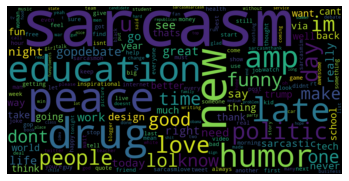

In [21]:
# Word Cloud

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
text = ''
for data in data01.clean_tweets:
  text += ' '.join(map(str, data))

word_cloud = WordCloud(width = 1200, height=600, collocations = False, background_color = 'black').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
Glove_dir='C:/05pythonworkspace/glove/twitter'
embedding_index = {}
glove_file = open(os.path.join(Glove_dir,'glove.twitter.27B.100d.txt'),'r', encoding="utf-8")
for line in glove_file:
    datas = line.split()
    word = datas[0]
    coefficients = np.asarray(datas[1:], dtype='float32')
    embedding_index[word] = coefficients
glove_file.close()

print('This has %s words' %len(embedding_index))

This has 1193514 words


In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data01['clean_tweets'])
word_index = tokenizer.word_index